In [ ]:
import cv2

In [ ]:
import os

# Specify the folder paths
main_folder = "C:/Users/lenovo/ML_Project/Entertainment Recommendation/archive"
test_folder = "test"
train_folder = "train"

In [ ]:
angry_folder = "angry"
disgust_folder = "disgust"
fear_folder = "fear"
happy_folder = "happy"
neutral_folder = "neutral"
sad_folder = "sad"
surprise_folder = "surprise"

In [ ]:
# Use string interpolation with .format() to create the path to the subfolder
angry_folder_path = "{}/{}/{}".format(main_folder, train_folder, angry_folder)

# Use os.listdir() to list the files and directories in the subfolder
files = os.listdir(angry_folder_path)
print(len(files))

In [ ]:
angry_img = []

In [ ]:
for filename in os.listdir(angry_folder_path):
    img = cv2.imread(os.path.join(angry_folder_path, filename))
    if img is not None:
        angry_img.append(img)


In [ ]:
import matplotlib.pyplot as plt

# Display the image using the imshow() function
plt.imshow(angry_img[0])

# Display the plot
plt.show()

In [ ]:
print(angry_img[0].shape)

In [ ]:
# Set the desired dimensions for the resized image
new_width = 100
new_height = 100

# Resize the image using OpenCV's resize() function
resized_image = cv2.resize(angry_img[0], (new_width, new_height))

# Display the resized image using the imshow() function
plt.imshow(resized_image, extent=[0, new_width, 0, new_height])

# Display the plot
plt.show()


In [ ]:
plt.figure(figsize = (15,15));
for i,j in enumerate(angry_img):
    if i<15:
        plt.subplot(1,15,i+1)
        plt.imshow(j);
        plt.tight_layout()
    else:
        break

In [1]:
##model pytorch

In [2]:
import time

In [3]:
startTime = time.time()
import torch
import torch.nn as nn
from torch.utils.data.dataset import Dataset
import torchvision.transforms as T
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import f1_score, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image

print("Time of Completion for this cell is: ", round((time.time() - startTime)/60, 2), "Minutes")

Time of Completion for this cell is:  0.16 Minutes


In [4]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
NUM_CLASSES = len(CLASS_LABELS)
label_dict = {i:CLASS_LABELS[i] for i in np.arange(NUM_CLASSES)}

In [5]:
startTime = time.time()
df = pd.read_csv('fer2013.csv')
print("Time of Completion for this cell is: ", round((time.time() - startTime)/60, 2), "Minutes")

Time of Completion for this cell is:  0.05 Minutes


In [6]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

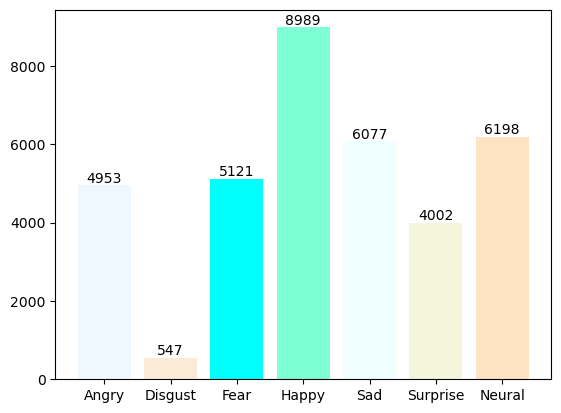

In [7]:
lab = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neural']
labels_num = df.emotion.value_counts()
la = [0,1,2,3,4,5,6]
la_num = [labels_num[i] for i in range(len(labels_num))]
colors = [mcolors.CSS4_COLORS[color] for color in mcolors.CSS4_COLORS][:len(la_num)] # Select the first len(la_num) colors from the list of named colors
# print(labels_num)
plt.bar(range(len(la_num)), la_num, color=colors, tick_label=lab)
for a,b in zip(la,la_num):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)  
plt.show()

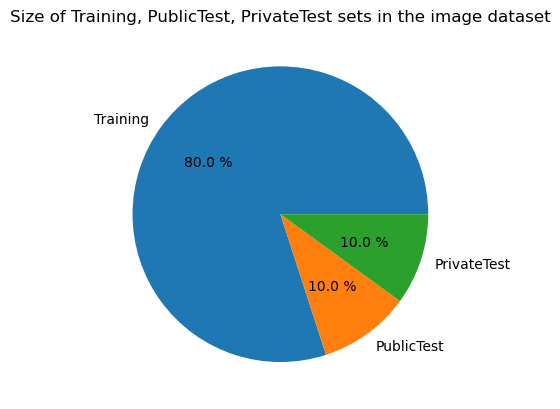

In [8]:
sets = df.Usage.value_counts()
da = [sets[i] for i in range(len(sets))]
set_la = ['Training','PublicTest','PrivateTest']
# print(sets)
plt.axes(aspect=1)
plt.title('Size of Training, PublicTest, PrivateTest sets in the image dataset')
plt.pie(x = da,labels = set_la,autopct='%3.1f %%')
plt.show()

In [9]:
startTime = time.time() 
# Transform df column with pixels into a pytorch tensor
pixels = df['pixels']
pixels = pixels.apply(lambda x: x.split(" ")).tolist()
pixels = np.uint8(pixels)
pixels = torch.Tensor(pixels)
pixels = torch.reshape(pixels, (pixels.shape[0], 1, 48, 48))

print("Time of Completion for this cell is: ", round((time.time() - startTime)/60, 2), "Minutes")

Time of Completion for this cell is:  0.88 Minutes


In [10]:
train_idx = df.index[df['Usage'] == 'Training'].tolist()
val_idx   = df.index[df['Usage'] == 'PublicTest'].tolist()
test_idx  = df.index[df['Usage'] == 'PrivateTest'].tolist()

X_train = pixels[train_idx]
y_train = torch.Tensor(df.iloc[train_idx]['emotion'].tolist())
X_val = pixels[val_idx]
y_val = torch.Tensor(df.iloc[val_idx]['emotion'].tolist())
X_test = pixels[test_idx]
y_test = torch.Tensor(df.iloc[test_idx]['emotion'].tolist())

In [11]:
print(f'Train set shape: {list(X_train.shape)}, labels shape: {list(y_train.shape)}')
print(f'Validation set shape: {list(X_val.shape)}, labels shape: {list(y_val.shape)}')
print(f'Test set shape: {list(X_test.shape)}, labels shape: {list(y_test.shape)}')

Train set shape: [28709, 1, 48, 48], labels shape: [28709]
Validation set shape: [3589, 1, 48, 48], labels shape: [3589]
Test set shape: [3589, 1, 48, 48], labels shape: [3589]


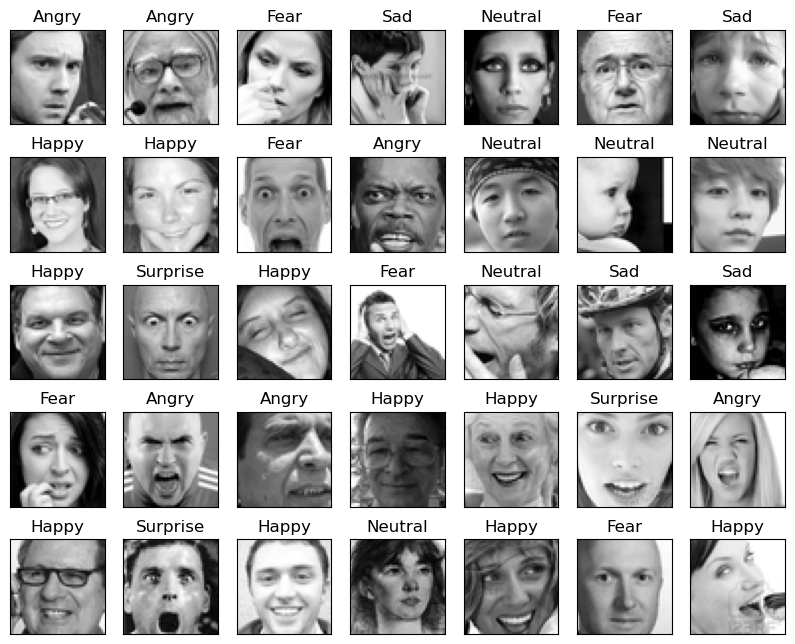

In [12]:
fig = plt.figure(figsize = (10,8))
for i in range(len(X_train[:35])):
    if(y_train[i] == 0 ):
        str_la = 'Angry'
        img = Image.fromarray(np.uint8(X_train[i].squeeze()))
    elif(y_train[i] == 1):
        str_la = 'Disgust'
        img = Image.fromarray(np.uint8(X_train[i].squeeze()))
    elif(y_train[i] == 2):
        str_la = 'Fear'
        img = Image.fromarray(np.uint8(X_train[i].squeeze()))
    elif(y_train[i] == 3):
        str_la = 'Happy'
        img = Image.fromarray(np.uint8(X_train[i].squeeze()))
    elif(y_train[i] == 4):
        str_la = 'Sad'
        img = Image.fromarray(np.uint8(X_train[i].squeeze()))
    elif(y_train[i] == 5):
        str_la = 'Surprise'
        img = Image.fromarray(np.uint8(X_train[i].squeeze()))
    elif(y_train[i] == 6):
        str_la = 'Neutral'
        img = Image.fromarray(np.uint8(X_train[i].squeeze()))
    row = i // 7
    col = i % 7
    y = fig.add_subplot(5, 7, 7 * row + col + 1)
    y.imshow(img, cmap='gray')
    plt.title(str_la)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [13]:
class tensorDataset(Dataset):
    '''
    Inputs:
    - images: a [Batch size, Channels, Height, Width] tensor
    - labels: a 1-dimensional tensor corresponding to image labels
    - train: True if you want to apply transformations, False otherwise
    '''
    
    def __init__(self, images, labels, train:bool):
        self.images = images/255
        self.labels = labels
        self.train  = train
        

    def __getitem__(self, index):
        
        # Load the image (as tensor)
        img  = self.images[index]
        label = self.labels[index]
        
        # Apply transformations
        if self.train == True:
            img = self.transform(img)

        # Turn on gradient for image
        img = img.detach().clone().requires_grad_(True)
        
        return img, label

    
    def __len__(self):
        return len(self.images)
    
    
    def transform(self, img):
      
        # Horizontal flip
        if np.random.rand() < 0.3:
            t_horizonal_flip = T.RandomHorizontalFlip(p=1)
            img = t_horizonal_flip(img)

        # Add rotations
        if np.random.rand() < 0.3:
            t_rotation = T.RandomRotation(degrees=(-20, 20))
            img = t_rotation(img)

        return img


In [14]:
def create_dataloaders(batch_size, X_train, y_train, X_val, y_val, X_test=None, y_test=None):

    train_dataset = tensorDataset(X_train, y_train, train=True)
    val_dataset   = tensorDataset(X_val, y_val, train=False)

    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_dataloader   = DataLoader(val_dataset  , batch_size=BATCH_SIZE, shuffle=False)

    if X_test is not None:
        test_dataset  = tensorDataset(X_test, y_test, train=False)
        test_dataloader  = DataLoader(test_dataset , batch_size=BATCH_SIZE, shuffle=False)
        return train_dataloader, val_dataloader, test_dataloader
    
    return train_dataloader, val_dataloader

In [ ]:
class CNN_layer(nn.Module):
    def __init__(self, in_channels=1, out_channels=7):
        super(CNN_layer, self).__init__()
        self.network = nn.Sequential(
           #nn.Conv2d(input_channel, output_channel)
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size = (3, 3), padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size = (3, 3), stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size = (3, 3), stride = 1, padding = 1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(in_channels=128 , out_channels=256, kernel_size = (3, 3), stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size = (3, 3), stride = 1, padding = 1),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.LazyLinear(1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Linear(64,7)
        )
    
    def forward(self, xb):
        return self.network(xb)

In [19]:
class EmotionCNN(nn.Module):
    def __init__(self, in_channels=1, out_channels=7):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3), padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1)
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=(3, 3), padding=1)
        self.dropout2 = nn.Dropout(0.25)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=(3, 3), padding=1)
        self.dropout3 = nn.Dropout(0.5)
        self.fc1 = nn.LazyLinear(256)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 7)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.dropout1(x)
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = self.dropout3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout4(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


In [20]:
!pip install torchinfo
from torchinfo import summary

In [21]:
model = EmotionCNN(in_channels=1, out_channels=NUM_CLASSES)
summary(model, input_size=(99, 1, 48, 48))

C:\Users\lenovo\anaconda3\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Layer (type:depth-idx)                   Output Shape              Param #
EmotionCNN                               [99, 7]                   --
├─Conv2d: 1-1                            [99, 32, 48, 48]          320
├─Conv2d: 1-2                            [99, 64, 48, 48]          18,496
├─MaxPool2d: 1-3                         [99, 64, 24, 24]          --
├─Dropout: 1-4                           [99, 64, 24, 24]          --
├─Conv2d: 1-5                            [99, 128, 24, 24]         73,856
├─Dropout: 1-6                           [99, 128, 24, 24]         --
├─Conv2d: 1-7                            [99, 256, 24, 24]         295,168
├─Dropout: 1-8                           [99, 256, 24, 24]         --
├─Linear: 1-9                            [99, 256]                 37,748,992
├─Dropout: 1-10                          [99, 256]                 --
├─Linear: 1-11                           [99, 7]                   1,799
├─Softmax: 1-12                          [99, 7]            

In [22]:
def train():

    for epoch in range(1, EPOCHS+1):

        # Train model
        model.train()
        train_losses   = []
        train_accuracy = []
        train_f1       = []

        for i, batch in enumerate(train_dataloader):
            #Extract data, labels
            img_batch, label_batch = batch   #img [B,3,H,W], label[B,N_CLASSES]
            img_batch = img_batch.to(DEVICE)
            label_batch = label_batch.type(torch.LongTensor).to(DEVICE)

            #Train model
            optimizer.zero_grad()
            output = model(img_batch) # output: [B, 7, H, W]
            loss   = criterion(output, label_batch)
            loss.backward()
            optimizer.step()

            #Add current loss to temporary list (after 1 epoch take avg of all batch losses)
            preds = torch.argmax(output, dim=1)
            f1 = f1_score(preds.cpu(), label_batch.cpu(), average='macro')
            acc = torch.sum(preds == label_batch) / len(preds)
            train_losses.append(loss.item())
            train_accuracy.append(acc.cpu())
            train_f1.append(f1)
            # print(f'Train Epoch: {epoch}, batch: {i} | Batch metrics | loss: {loss.item():.4f}, f1: {f1:.3f}, accuracy: {acc:.3f}')

        # Update global metrics
        print(f'TRAIN       Epoch: {epoch} | Epoch metrics | loss: {np.mean(train_losses):.4f}, f1: {np.mean(train_f1):.3f}, accuracy: {np.mean(train_accuracy):.3f}, learning rate: {optimizer.state_dict()["param_groups"][0]["lr"]:.6f}')        
        total_train_losses.append(np.mean(train_losses))
        total_train_accuracy.append(np.mean(train_accuracy))
        total_train_f1.append(np.mean(train_f1))

        #Update learning rate
        learning_rate_tracker.append(optimizer.state_dict()['param_groups'][0]['lr'])
        scheduler.step()

        # Validate model
        model.eval()
        val_losses   = []
        val_accuracy = []
        val_f1       = []

        for i, batch in enumerate(val_dataloader):
            #Extract data, labels
            img_batch, label_batch = batch
            img_batch = img_batch.to(DEVICE)
            label_batch = label_batch.type(torch.LongTensor).to(DEVICE)

            #Validate model
            with torch.cuda.amp.autocast():
                output = model(img_batch)
                loss   = criterion(output, label_batch)

            #Add current loss to temporary list (after 1 epoch take avg of all batch losses)
            preds = torch.argmax(output, dim=1)
            f1 = f1_score(preds.cpu(), label_batch.cpu(), average='macro')
            acc = torch.sum(preds == label_batch) / len(preds)
            val_losses.append(loss.item())
            val_accuracy.append(acc.cpu())
            val_f1.append(f1)
            # print(f'Val Epoch: {epoch}, batch: {i} | Batch metrics | loss: {loss.item():.4f}, f1: {f1:.3f}, accuracy: {acc:.3f}')

        # Update global metrics
        print(f'VALIDATION  Epoch: {epoch} | Epoch metrics | loss: {np.mean(val_losses):.4f}, f1: {np.mean(val_f1):.3f}, accuracy: {np.mean(val_accuracy):.3f}')
        print('-'*106)
        total_val_losses.append(np.mean(val_losses))
        total_val_accuracy.append(np.mean(val_accuracy))
        total_val_f1.append(np.mean(val_f1))


        # Save the results so far
        temp_df = pd.DataFrame(list(zip(total_train_losses, total_val_losses, total_train_f1, total_val_f1,
                                    total_train_accuracy, total_val_accuracy)),
                            columns = ['train_loss', 'val_loss', 'train_f1', 'test_f1', 'train_accuracy',
                                      'test_accuracy'])
        temp_df.to_csv('train_val_measures')

In [23]:
# HYPERPARAMETERS for training run
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
EPOCHS = 30
LR = 0.01
BATCH_SIZE = 64
max_split_size_mb = 200
torch.backends.cuda.split_kernel_size = max_split_size_mb * 1024 * 1024

model = EmotionCNN(in_channels=1, out_channels=NUM_CLASSES).to(DEVICE)
train_dataloader, val_dataloader, test_dataloader = create_dataloaders(BATCH_SIZE, X_train, y_train, X_val, y_val, X_test, y_test)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1.5) # Using dynamic learning rate
criterion = nn.CrossEntropyLoss().to(DEVICE)

total_train_losses     = []
total_val_losses       = []
total_train_accuracy   = []
total_val_accuracy     = []
total_train_f1         = []
total_val_f1           = []
learning_rate_tracker  = []

In [24]:
startTime = time.time()
train()

TRAIN       Epoch: 1 | Epoch metrics | loss: 2.0166, f1: 0.057, accuracy: 0.149, learning rate: 0.010000
VALIDATION  Epoch: 1 | Epoch metrics | loss: nan, f1: 0.034, accuracy: 0.128
----------------------------------------------------------------------------------------------------------
TRAIN       Epoch: 2 | Epoch metrics | loss: 2.0238, f1: 0.053, accuracy: 0.142, learning rate: 0.010000
VALIDATION  Epoch: 2 | Epoch metrics | loss: nan, f1: 0.034, accuracy: 0.128
----------------------------------------------------------------------------------------------------------
TRAIN       Epoch: 3 | Epoch metrics | loss: 2.0223, f1: 0.054, accuracy: 0.143, learning rate: 0.010000
VALIDATION  Epoch: 3 | Epoch metrics | loss: nan, f1: 0.034, accuracy: 0.128
----------------------------------------------------------------------------------------------------------
TRAIN       Epoch: 4 | Epoch metrics | loss: 2.0234, f1: 0.054, accuracy: 0.142, learning rate: 0.010000
VALIDATION  Epoch: 4 | Epoch

KeyboardInterrupt: 

In [ ]:
print("Time of Completion for the train function to complete is: ", round((time.time() - startTime)/60, 2), "Minutes")